<a href="https://colab.research.google.com/github/rlawogjs96/deeplearningnlp_starters/blob/main/LSTM_FinanceDataReader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **삼성전가 주가 예측 모델** 
FinanceDataReader 파이썬 패키지를 활용해보겠습니다. 이 FinanceDataReader를 활용하면 파일데이터로 주가 데이터를 수집할 필요 없이 가장 최신의 업데이트된 데이터를 API콜을 통해 DataFrame으로 받아올 수 있습니다. 

### **LSTM을 활용한 주가 예측 모델**
다음과 같은 Pipeline을 통하여 주가 예측을 진행해보겠습니다. 
* FinanceDataReader를 활용하여 주가 데이터 받아오기 
* Tensorflow Dataset 클래스를 활용하여 주가 데이터 구축하기 
* LSTM 을 활용한 주가 예측 모델 구축하기 



#### **모듈 Import**

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import os 

%matplotlib inline 
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Dejavu Sans'

[FinanceReader GitHub Repo](https://github.com/financedata-org/FinanceDataReader)는 주가 데이터를 편리하게 가져올 수 있는 패키지입니다.

In [3]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import FinanceDataReader as fdr

In [5]:
# 삼성전자(005930) 전체 (1996-11-05 ~ 현재시점)
samsung = fdr.DataReader('005930')

#### **컬럼 설명** 
* `Open`: 시가 
* `High`: 고가 
* `Low`: 저가 
* `Close`: 종가 
* `Volume`: 거래량 
* `Change`: 대비


In [6]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-09-01,58700,58900,58300,58400,14905777,-0.021776
2022-09-02,58300,58600,57500,57500,15040310,-0.015411
2022-09-05,57400,57800,56800,57100,11425977,-0.006957
2022-09-06,57200,57600,56900,57100,7503086,0.000000
2022-09-07,56700,56700,55900,56000,10207386,-0.019264


In [7]:
# Apple(APPL), 애플 
apple = fdr.DataReader('AAPL')

In [8]:
apple.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-08-30,158.91,162.13,162.56,157.72,74790000.0,-0.0153
2022-08-31,157.22,160.12,160.56,157.19,85290000.0,-0.0106
2022-09-01,157.96,156.54,158.36,154.70,73540000.0,0.0047
2022-09-02,155.81,159.90,160.36,154.97,76310000.0,-0.0136
2022-09-06,154.53,156.42,157.07,153.73,73090000.0,-0.0082


In [10]:
# 2017년 시점 이후의 주식 데이터 불러오기 
apple = fdr.DataReader('AAPL', '2017')
apple.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-01-03,29.04,28.95,29.08,28.69,115130000.0,0.0031
2017-01-04,29.00,28.96,29.13,28.94,84470000.0,-0.0014
2017-01-05,29.15,28.98,29.22,28.95,88770000.0,0.0052
2017-01-06,29.48,29.20,29.54,29.12,127010000.0,0.0113
2017-01-09,29.75,29.49,29.86,29.48,134250000.0,0.0092


**시작** 과 **끝** 날짜를 지정하여 범위 데이터를 가져올 수 있습니다.

In [11]:
# Ford(F), 1980-01-01 ~ 2019-12-30 (40년간의 데이터) 
ford = fdr.DataReader('F', '1980-01-01', '2019-12-30')

In [12]:
ford.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1980-03-18,1.83,1.83,1.85,1.82,3770000.0,-0.0108
1980-03-19,1.85,1.85,1.86,1.83,1560000.0,0.0109
1980-03-20,1.86,1.86,1.88,1.85,1450000.0,0.0054
1980-03-21,1.78,1.78,1.85,1.76,5020000.0,-0.0430
1980-03-24,1.71,1.71,1.75,1.66,3330000.0,-0.0393


In [13]:
ford.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-12-23,9.44,9.50,9.57,9.40,54800000.0,-0.0042
2019-12-24,9.47,9.44,9.49,9.43,11880000.0,0.0032
2019-12-26,9.45,9.47,9.49,9.43,28980000.0,-0.0021
2019-12-27,9.36,9.45,9.46,9.35,28270000.0,-0.0095
2019-12-30,9.25,9.34,9.35,9.23,36090000.0,-0.0118


### **주가 데이터 가져오기**

In [14]:
# 삼성전자 주식코드: 005930 
STOCK_CODE = '005930'

In [15]:
stock = fdr.DataReader(STOCK_CODE) 

In [16]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-06-26,754,791,754,754,302831,NaN
1998-06-27,757,780,756,769,140840,0.019894
1998-06-29,781,791,765,765,330510,-0.005202
1998-06-30,765,809,755,791,373730,0.033987
1998-07-01,804,886,796,886,719666,0.120101


In [17]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-09-01,58700,58900,58300,58400,14905777,-0.021776
2022-09-02,58300,58600,57500,57500,15040310,-0.015411
2022-09-05,57400,57800,56800,57100,11425977,-0.006957
2022-09-06,57200,57600,56900,57100,7503086,0.000000
2022-09-07,56700,56700,55900,56100,10286610,-0.017513


In [18]:
stock.index

DatetimeIndex(['1998-06-26', '1998-06-27', '1998-06-29', '1998-06-30',
               '1998-07-01', '1998-07-02', '1998-07-03', '1998-07-04',
               '1998-07-06', '1998-07-07',
               ...
               '2022-08-25', '2022-08-26', '2022-08-29', '2022-08-30',
               '2022-08-31', '2022-09-01', '2022-09-02', '2022-09-05',
               '2022-09-06', '2022-09-07'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

index 가 `DatetimeIndex`로 지정되어있다. `DatetimeIndex`로 정의되어 있다면, 아래와 같이 연도, 월, 일을 쪼갤 수 있고, **월별, 연도별 피벗데이터**를 만들때 유용하게 활용할 수 있다.

In [19]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day 

In [20]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1998-06-26,754,791,754,754,302831,NaN,1998,6,26
1998-06-27,757,780,756,769,140840,0.019894,1998,6,27
1998-06-29,781,791,765,765,330510,-0.005202,1998,6,29
1998-06-30,765,809,755,791,373730,0.033987,1998,6,30
1998-07-01,804,886,796,886,719666,0.120101,1998,7,1


### **시각화**

Text(0, 0.5, 'price')

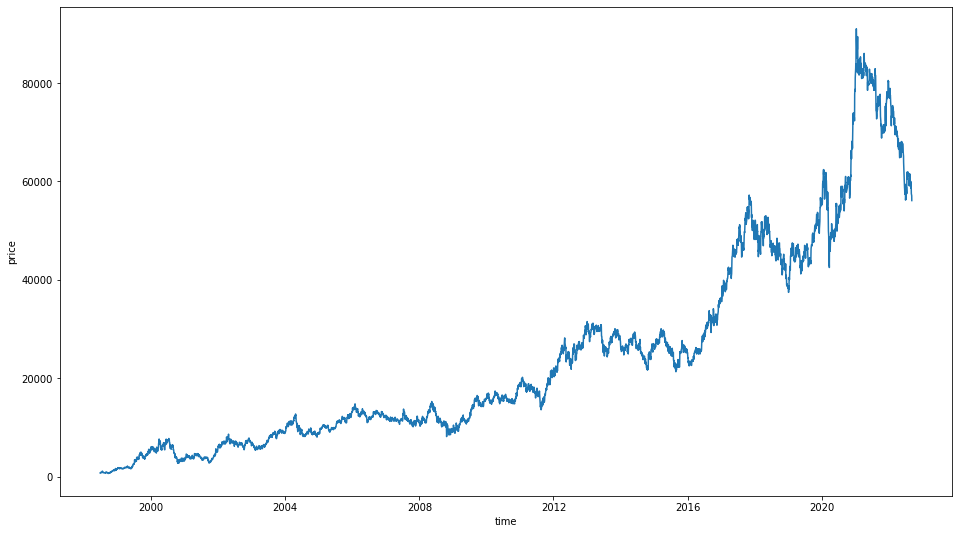

In [25]:
plt.figure(figsize = (16,9))
sns.lineplot(y=stock['Close'], x = stock.index)
plt.xlabel('time')
plt.ylabel('price')

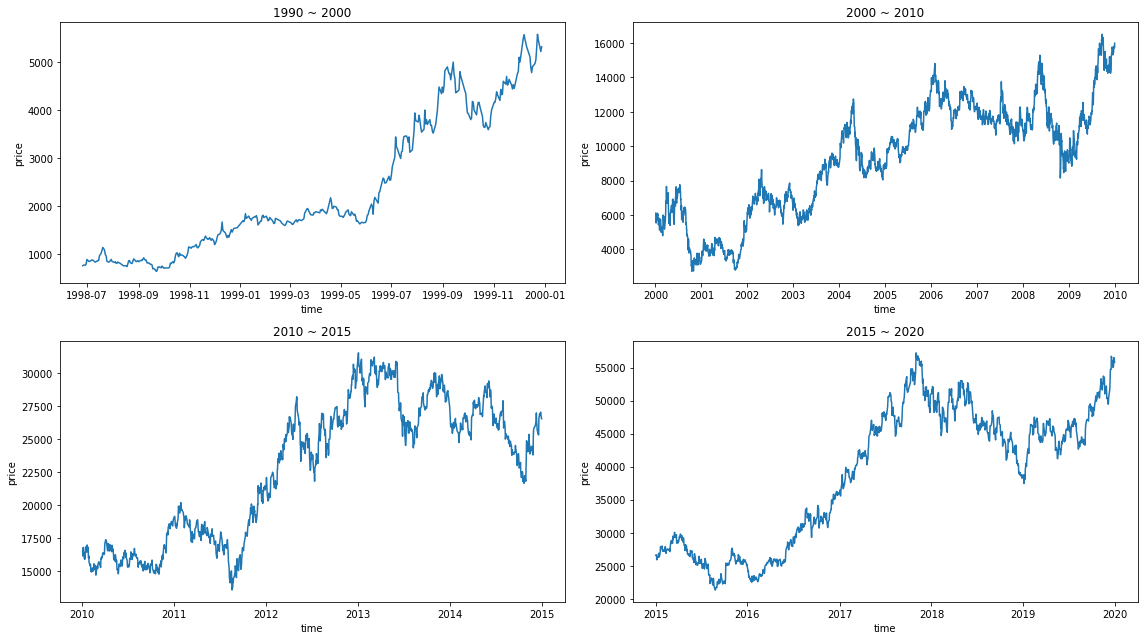

In [29]:
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2,2) 
fig.set_size_inches(16,9)
for i in range(4): 
  ax = axes[i//2, i%2]
  df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
  sns.lineplot(y=df['Close'], x=df.index, ax=ax)
  ax.set_title(f'{time_steps[i][0]} ~ {time_steps[i][1]}')
  ax.set_xlabel('time')
  ax.set_ylabel('price') 
plt.tight_layout() 
plt.show()

### **데이터 전처리** 
주가 데이터에 대하여 딥러닝 모델이 더 잘 학습할 수 있도록 **정규화(Normalization)**을 합니다. 

In [35]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.00834994, 0.00817149, 0.00842458, 0.00128373, 0.00335338],
       [0.00838317, 0.00805785, 0.00844693, 0.00144972, 0.00155958],
       [0.00864895, 0.00817149, 0.00854749, 0.00140546, 0.00365988],
       ...,
       [0.63565891, 0.59710744, 0.63463687, 0.6248423 , 0.12652487],
       [0.63344408, 0.59504132, 0.63575419, 0.6248423 , 0.08308497],
       [0.62790698, 0.5857438 , 0.62458101, 0.6137757 , 0.11390815]])

스케일이 완료된 column으로 새로운 데이터프레임을 생성하겠습니다. **시간 순으로 정렬**되어 있고, datetime index는 제외되어있습니다. 6,000개의 row, 5개 column으로 이루어진 데이터셋이 DataFrame으로 정리되어있습니다.

In [36]:
df = pd.DataFrame(scaled, columns = scale_cols)

### **train/test 분할**

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close',1),df['Close'], test_size = 0.2, random_state = 0, shuffle = False)

In [39]:
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [40]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [42]:
x_train

,Open,High,Low,Volume
0,0.008350,0.008171,0.008425,0.003353
1,0.008383,0.008058,0.008447,0.001560
2,0.008649,0.008171,0.008547,0.003660
3,0.008472,0.008357,0.008436,0.004138
4,0.008904,0.009153,0.008894,0.007969
...,...,...,...,...
4795,0.605748,0.565072,0.591955,0.002682
4796,0.584718,0.558884,0.589944,0.001778
4797,0.604651,0.564463,0.603352,0.001841
4798,0.605748,0.565909,0.603799,0.001286


### **TensorFlow Dataset을 활용한 시퀀스 데이터셋 구성**

In [43]:
import tensorflow as tf

In [44]:
def windowed_dataset(series, window_size, batch_size, shuffle): 
  series = tf.expand_dims(series, axis = -1)
  ds = tf.data.Dataset.from_tensor_slices(series) 
  ds = ds.window(window_size + 1, shift=1, drop_remainder = True) 
  ds = ds.flat_map(lambda w: w.batch(window_size+1)) 
  if shuffle: 
    ds = ds.shuffle(1000) 
  ds = ds.map(lambda w: (w[:-1], w[-1])) 
  return ds.batch(batch_size).prefetch(1)

In [45]:
# Hyperparameter를 정의 
WINDOW_SIZE = 20
BATCH_SIZE = 32

In [46]:
# train_data & test_data
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True) 
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [47]:
# X: (batch_size, window_size, feature) 
# y: (batch_size, feature) 
for data in train_data.take(1): 
  print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
  print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


### **모델**

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [49]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [50]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [51]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
    146/Unknown - 15s 7ms/step - loss: 1.7683e-04 - mse: 3.5366e-04
Epoch 1: val_loss improved from inf to 0.00142, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 16s 14ms/step - loss: 1.7448e-04 - mse: 3.4895e-04 - val_loss: 0.0014 - val_mse: 0.0028
Epoch 2/50
142/150 [===========================>..] - ETA: 0s - loss: 2.5807e-05 - mse: 5.1615e-05
Epoch 2: val_loss improved from 0.00142 to 0.00114, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 2s 10ms/step - loss: 2.7443e-05 - mse: 5.4886e-05 - val_loss: 0.0011 - val_mse: 0.0023
Epoch 3/50
147/150 [============================>.] - ETA: 0s - loss: 2.3200e-05 - mse: 4.6399e-05
Epoch 3: val_loss improved from 0.00114 to 0.00107, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 1s 9ms/step - loss: 2.3556e-05 - mse: 4.7111e-05 - val_loss: 0.0011 - val_mse: 0.0021
Epoch 4/50
148/150 [============================>.] - ETA: 0s - los

In [52]:
model.load_weights(filename)


In [53]:
pred = model.predict(test_data)
pred.shape

(1180, 1)

### **예측 데이터 시각화**

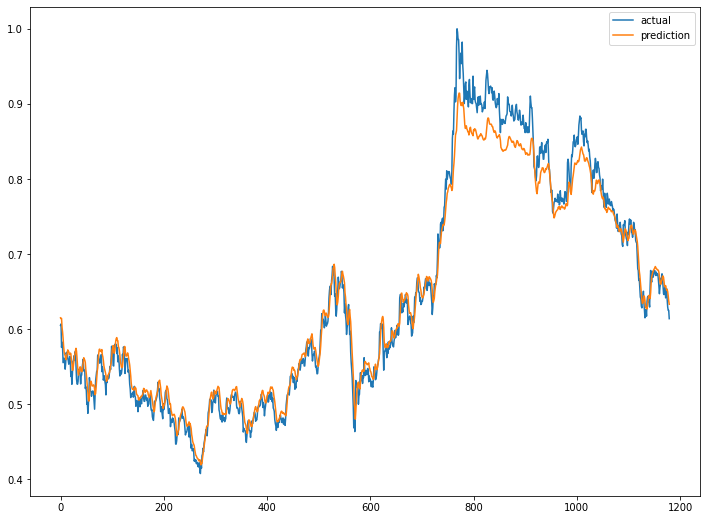

In [54]:
plt.figure(figsize=(12,9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label = 'prediction')
plt.legend() 
plt.show()